In [3]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers
import numpy as np

In [4]:
from keras.utils import FeatureSpace
from keras.utils import to_categorical

In [33]:
data1 =pd.read_csv('/content/drive/MyDrive/eiiid/covtype.data')

In [34]:
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

In [35]:
data1.columns = feature_names

In [36]:
data1.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [9]:
train_X = data1.iloc[:, :-1].to_numpy()
train_Y = data1.iloc[:, -1].to_numpy() - 1

In [14]:
train_X

array([[2590,   56,    2, ...,    0,    0,    0],
       [2804,  139,    9, ...,    0,    0,    0],
       [2785,  155,   18, ...,    0,    0,    0],
       ...,
       [2386,  159,   17, ...,    0,    0,    0],
       [2384,  170,   15, ...,    0,    0,    0],
       [2383,  165,   13, ...,    0,    0,    0]])

In [10]:
train_Y = to_categorical(train_Y)

In [22]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_dim=train_X.shape[1]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_X, train_Y, epochs=10, batch_size=128)


_, accuracy = model.evaluate(train_X, train_Y)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/10
4540/4540 [==============================] - 31s 7ms/step - loss: 1.6771 - accuracy: 0.6199
Epoch 2/10
4540/4540 [==============================] - 27s 6ms/step - loss: 0.6884 - accuracy: 0.7044
Epoch 3/10
4540/4540 [==============================] - 29s 6ms/step - loss: 0.6365 - accuracy: 0.7255
Epoch 4/10
4540/4540 [==============================] - 27s 6ms/step - loss: 0.5889 - accuracy: 0.7475
Epoch 5/10
4540/4540 [==============================] - 30s 7ms/step - loss: 0.5454 - accuracy: 0.7666
Epoch 6/10
4540/4540 [==============================] - 28s 6ms/step - loss: 0.5156 - accuracy: 0.7802
Epoch 7/10
4540/4540 [==============================] - 26s 6ms/step - loss: 0.4949 - accuracy: 0.7896
Epoch 8/10
4540/4540 [==============================] - 24s 5ms/step - loss: 0.4784 - accuracy: 0.7970
Epoch 9/10
4540/4540 [==============================] - 28s 6ms/step - loss: 0.4650 - accuracy: 0.8028
Epoch 10/10
18157/18157 [==============================] - 36s 2ms/step -

In [37]:
data1=data1.iloc[:10000]

In [38]:
val_data = data1.sample(frac=0.2, random_state=1337)
train_data = data1.drop(val_data.index)

In [13]:
print(
    "Using %d samples for training and %d for validation"
     % (len(train_data), len(val_data))
)

Using 8000 samples for training and 2000 for validation


In [39]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("Cover_Type")
    labels=to_categorical(labels)
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [40]:
train_ds = dataframe_to_dataset(train_data)
val_ds = dataframe_to_dataset(val_data)

In [41]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [42]:
feature_space = FeatureSpace(
    features={
        # Categorical features encoded as integers
        "Slope": "integer_categorical",
        "Wilderness_Area1":"integer_categorical",
        "Wilderness_Area2":"integer_categorical",
        "Wilderness_Area3":"integer_categorical",
        "Wilderness_Area4":"integer_categorical",
        "Soil_Type1": "integer_categorical",
        "Soil_Type2": "integer_categorical",
        "Soil_Type3": "integer_categorical",
        "Soil_Type4": "integer_categorical",
        "Soil_Type5": "integer_categorical",
        "Soil_Type6": "integer_categorical",
        "Soil_Type7": "integer_categorical",
        "Soil_Type8": "integer_categorical",
        "Soil_Type9": "integer_categorical",
        "Soil_Type10": "integer_categorical",
        "Soil_Type11": "integer_categorical",
        "Soil_Type12": "integer_categorical",
        "Soil_Type13": "integer_categorical",
        "Soil_Type14": "integer_categorical",
        "Soil_Type15": "integer_categorical",
        "Soil_Type16": "integer_categorical",
        "Soil_Type17": "integer_categorical",
        "Soil_Type18": "integer_categorical",
        "Soil_Type19": "integer_categorical",
        "Soil_Type20": "integer_categorical",
        "Soil_Type21": "integer_categorical",
        "Soil_Type22": "integer_categorical",
        "Soil_Type23": "integer_categorical",
        "Soil_Type24": "integer_categorical",
        "Soil_Type25": "integer_categorical",
        "Soil_Type26": "integer_categorical",
        "Soil_Type27": "integer_categorical",
        "Soil_Type28": "integer_categorical",
        "Soil_Type29": "integer_categorical",
        "Soil_Type30": "integer_categorical",
        "Soil_Type31": "integer_categorical",
        "Soil_Type32": "integer_categorical",
        "Soil_Type33": "integer_categorical",
        "Soil_Type34": "integer_categorical",
        "Soil_Type35": "integer_categorical",
        "Soil_Type36": "integer_categorical",
        "Soil_Type37": "integer_categorical",
        "Soil_Type38": "integer_categorical",
        "Soil_Type39": "integer_categorical",
        "Soil_Type40": "integer_categorical",

        # Numerical features to normalize
        "Elevation": "float_normalized",
        "Aspect": "float_normalized",
        "Horizontal_Distance_To_Hydrology": "float_normalized",
        "Vertical_Distance_To_Hydrology": "float_normalized",
        "Horizontal_Distance_To_Roadways": "float_normalized",
        "Hillshade_9am": "float_normalized",
        "Hillshade_Noon": "float_normalized",
        "Hillshade_3pm": "float_normalized",
        "Horizontal_Distance_To_Fire_Points": "float_normalized",
    },
    # Our utility will one-hot encode all categorical
    # features and concat all features into a single
    # vector (one vector per sample).
    output_mode="concat",
)

In [43]:
train_ds_with_no_labels = train_ds.map(lambda x, _: x)
feature_space.adapt(train_ds_with_no_labels)

In [44]:
for x, _ in train_ds.take(1):
    preprocessed_x = feature_space(x)
    print("preprocessed_x.shape:", preprocessed_x.shape)
    print("preprocessed_x.dtype:", preprocessed_x.dtype)

preprocessed_x.shape: (32, 189)
preprocessed_x.dtype: <dtype: 'float32'>


In [45]:
preprocessed_train_ds = train_ds.map(
    lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE
)
preprocessed_train_ds = preprocessed_train_ds.prefetch(tf.data.AUTOTUNE)

preprocessed_val_ds = val_ds.map(
    lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE
)
preprocessed_val_ds = preprocessed_val_ds.prefetch(tf.data.AUTOTUNE)

In [46]:
dict_inputs = feature_space.get_inputs()
encoded_features = feature_space.get_encoded_features()

In [62]:
x = keras.layers.Dense(512, activation="relu")(encoded_features)
#x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(256, activation="relu")(x)
#x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation="relu")(x)
#x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(64, activation="relu")(x)
#x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(32, activation="relu")(x)
#x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(16, activation="relu")(x)
#x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(8, activation="softmax")(x)


In [63]:
training_model = keras.Model(inputs=encoded_features, outputs=predictions)
training_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [64]:
inference_model = keras.Model(inputs=dict_inputs, outputs=predictions)

In [65]:
history= training_model.fit(
    preprocessed_train_ds, epochs=30, validation_data=preprocessed_val_ds, verbose=2
)

Epoch 1/30
250/250 - 6s - loss: 1.1046 - accuracy: 0.5567 - val_loss: 0.7608 - val_accuracy: 0.6840 - 6s/epoch - 24ms/step
Epoch 2/30
250/250 - 3s - loss: 0.7560 - accuracy: 0.6715 - val_loss: 0.6923 - val_accuracy: 0.7010 - 3s/epoch - 12ms/step
Epoch 3/30
250/250 - 3s - loss: 0.7081 - accuracy: 0.6988 - val_loss: 0.6763 - val_accuracy: 0.7020 - 3s/epoch - 13ms/step
Epoch 4/30
250/250 - 5s - loss: 0.6628 - accuracy: 0.7212 - val_loss: 0.6390 - val_accuracy: 0.7345 - 5s/epoch - 19ms/step
Epoch 5/30
250/250 - 4s - loss: 0.6396 - accuracy: 0.7290 - val_loss: 0.6112 - val_accuracy: 0.7480 - 4s/epoch - 16ms/step
Epoch 6/30
250/250 - 3s - loss: 0.6084 - accuracy: 0.7419 - val_loss: 0.6685 - val_accuracy: 0.7300 - 3s/epoch - 12ms/step
Epoch 7/30
250/250 - 3s - loss: 0.5898 - accuracy: 0.7574 - val_loss: 0.5844 - val_accuracy: 0.7550 - 3s/epoch - 14ms/step
Epoch 8/30
250/250 - 5s - loss: 0.5584 - accuracy: 0.7638 - val_loss: 0.5892 - val_accuracy: 0.7580 - 5s/epoch - 20ms/step
Epoch 9/30
250/2

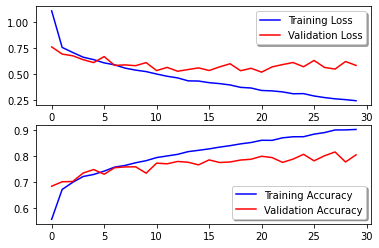

In [66]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)